Implemantation of the LOO algoritm for a Decision Tree model on Lipizzan horses data

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [169]:
all_anatomy_LR1=pd.read_excel('.\Lippa_data.xlsx','Anatomy', index_col='ID')
all_anatomy_LR1=all_anatomy_LR1.drop(['Timestamp', 'Horse', 'Temperature'], axis=1)
all_anatomy_LR2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Anatomy', index_col='ID')
all_anatomy_LR2=all_anatomy_LR2.drop(['Horse'], axis=1)
all_anatomy_LR=all_anatomy_LR1.append(all_anatomy_LR2).sort_index()
all_anatomy_LR['Sex']=all_anatomy_LR['Sex'].replace(['M','G'],['1','0'])

d:\Users\alexatopal\AppData\Local\Temp\13\ipykernel_16188\1128044065.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_anatomy_LR=all_anatomy_LR1.append(all_anatomy_LR2).sort_index()


In [170]:
kinematics1=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all', index_col='ID')
kinematics2=pd.read_excel('.\Lippa_experiments.xlsx','Kinematics_all_new25', index_col='ID')
kinematics_all=kinematics1.append(kinematics2).sort_index()

d:\Users\alexatopal\AppData\Local\Temp\13\ipykernel_16188\2403242403.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kinematics_all=kinematics1.append(kinematics2).sort_index()


In [171]:
housing1=pd.read_excel('.\Lippa_data.xlsx','Housing and work', index_col='ID')
housing1=housing1.drop(['Horse', 'Timestamp', 'School horse', 'Housing', 'Equine activities', 'Pasture', 'Number of caretakers', 'Box openess', 'Injury history' ], axis=1)
housing1['Type of work']='no'
housing1['Type of work']=housing1['Type of work'].where((housing1['Type of work']=='no')&(housing1['Work']==1), 'riding')
housing2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Housing and work', index_col='ID')
housing2=housing2.drop(['Horse'], axis=1)
housing2['Work']=housing2['Work'].replace(['yes','no'],[2,1])
housing=housing1.append(housing2).sort_index()
type_of_work=housing['Type of work'].unique()
housing['Type of work']=housing['Type of work'].replace(list(type_of_work), [0,1,2,3]) #no=0, riding=1, in training=2, show=3

d:\Users\alexatopal\AppData\Local\Temp\13\ipykernel_16188\2431845465.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  housing=housing1.append(housing2).sort_index()


In [172]:
digital_measurment_of_head1=pd.read_excel('.\Additional data 24 horses.xlsx','Head anatomy', index_col='ID')
digital_measurment_of_head1=digital_measurment_of_head1.drop(['Horse'], axis=1)
digital_measurment_of_head2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Additional anatomy', index_col='ID')
digital_measurment_of_head2=digital_measurment_of_head2.drop(['Horse'], axis=1)
digital_measurment_of_head=digital_measurment_of_head1.append(digital_measurment_of_head2).sort_index()

d:\Users\alexatopal\AppData\Local\Temp\13\ipykernel_16188\1343968500.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  digital_measurment_of_head=digital_measurment_of_head1.append(digital_measurment_of_head2).sort_index()


In [173]:
whorls_of_head1=pd.read_excel('.\Additional data 24 horses.xlsx','Whorls',index_col='ID' ) 
whorls_of_head1=whorls_of_head1.drop(['Horse', 'Number of whorls', 'Whorl2_Rotation', 'Whorl2_Height', 'Whorl2_Lateral location'], axis=1)
whorls_of_head2=pd.read_excel('.\Lippa_data_25ijs.xlsx','Whorls',index_col='ID' ) 
whorls_of_head2=whorls_of_head2.drop(['Horse', 'Number of whorls', 'Whorl2_Rotation', 'Whorl2_Height', 'Whorl2_Lateral location'], axis=1)
whorls_of_head=whorls_of_head1.append(whorls_of_head2).sort_index()

d:\Users\alexatopal\AppData\Local\Temp\13\ipykernel_16188\505618849.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whorls_of_head=whorls_of_head1.append(whorls_of_head2).sort_index()


In [174]:
fear_max_sum=pd.read_excel('.\Lippa_experiments.xlsx','Fear_max_sum49', index_col='ID')
fear_max_sum=fear_max_sum.sort_index()

Text(0, 0.5, 'Number of horses')

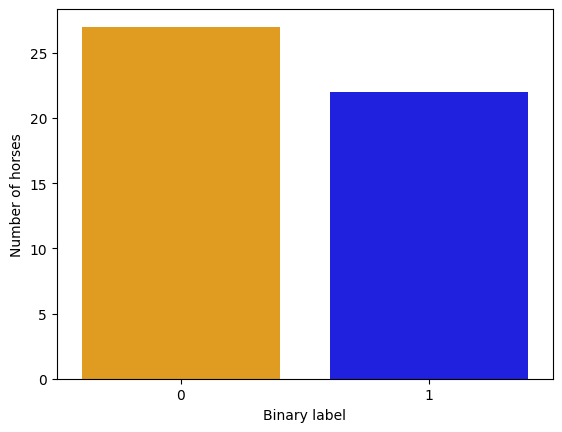

In [175]:
#target features = maximum from sum of repetition divided to two classes.
y=fear_max_sum['binary'] 
tt=fear_max_sum['binary'].value_counts()
plt.figure()
sns.barplot(x=tt.index, y=tt, palette=['orange', 'blue']);
plt.xlabel("Binary label") 
plt.ylabel('Number of horses')
#y

In [176]:
y=y.sort_index()
y.value_counts()


0    27
1    22
Name: binary, dtype: int64

In [177]:
X_initial=pd.concat([all_anatomy_LR, kinematics_all, housing, digital_measurment_of_head, whorls_of_head], axis=1)

#remove features that correlate with each other 
empty_list=[]
# LEFT+front measurements
corr_list_left=["FH10L", "FH11L", "FH12L", "FH13L", "FH14L", "FH16L", "FH18L", "FH19L", "FB08", "FB10L", "FB11L", "FB12L", "FB13L", \
            "FB15L", "FB16L", "FB18L", "FB19L", "FB20L", "FB21L", "FB22L", "FB23L", "FB24L", "FB25L", "FB26L", "FB27L", "FB28L",\
            "FB29L", "FB31L", "FB32L", "FB34L", "FB35L", "FB36L", "FB37L", "FB38", "FB39", "Walk_DV power", "Trot_Stride lengh",\
            "Work", "HMPF1", "HMPF2", "HMPF3", "HMPF4", "HMPF6", "HMPF22", "HMPF23",  "HMPF25", "HMPF27", "HMPF31",\
            "HMPF34", "HMPF35", "HMPF39", "HMPF37", "HMPF41", "HMPF43", "HMPF45", "HMPF47", "HMPL2", "HMPL11", "HMPL12","HMPL15"]

# RIGHT+front measurements
corr_list_right=["FH10R","FH11R","FH12R","FH13R","FH14R","FH16R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB12R","FB13R","FB14R",\
            "FB15R","FB16R","FB18R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R",\
            "FB32R","FB34R","FB35R","FB36R","FB37R","FB39","FB40","Walk_Speed","Trot_Speed","Type of work","HMPF2","HMPF3","HMPF5","HMPF7",\
            "HMPF20","HMPF21","HMPF24","HMPF26","HMPF30","HMPF32","HMPF33","HMPF36","HMPF38","HMPF40","HMPF42","HMPF44","HMPF46","HMPF69",\
            "HMPR2","HMPR11","HMPR12","HMPR15"]

# LEFT + additianal right + front measurements
corr_list_left_add=["FH10L", "FH11L", "FH12L", "FH13L", "FH14L", "FH16L", "FH18L", "FH19L", "FB08", "FB10L", "FB11L", "FB12L", "FB13L", \
            "FB15L", "FB16L", "FB18L", "FB19L", "FB20L", "FB21L", "FB22L", "FB23L", "FB24L", "FB25L", "FB26L", "FB27L", "FB28L",\
            "FB29L", "FB31L", "FB32L", "FB34L", "FB35L", "FB36L", "FB37L", "FB38", "FB39", "Walk_DV power", "Trot_Stride lengh",\
            "Work", "HMPF1", "HMPF2", "HMPF3", "HMPF4", "HMPF6", "HMPF22", "HMPF23", "HMPF45", "HMPF25", "HMPF27", "HMPF31",\
            "HMPF34", "HMPF35", "HMPF39", "HMPF37", "HMPF41", "HMPF43", "HMPF45", "HMPF47", "HMPL2", "HMPL11", "HMPL12","HMPL15",\
            "HMPF30", "HMPF32", "HMPF69", "HMPR2", "HMPR11", "HMPR12","HMPR15"] 

# # RIGHT + additianal left + front measurements
corr_list_right_add=["FH10R","FH11R","FH12R","FH13R","FH14R","FH16R","FH18R","FH19R","FB09","FB10R","FB11R","FB12R","FB12R","FB13R","FB14R",\
            "FB15R","FB16R","FB18R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R",\
            "FB32R","FB34R","FB35R","FB36R","FB37R","FB39","FB40","Walk_Speed","Trot_Speed","Type of work","HMPF2","HMPF3","HMPF5","HMPF7",\
            "HMPF20","HMPF21","HMPF24","HMPF26","HMPF30","HMPF32","HMPF33","HMPF36","HMPF38","HMPF40","HMPF42","HMPF44","HMPF46","HMPF71",\
            "HMPR2","HMPR11","HMPR12","HMPR15", "FB12L", "HMPF23", "HMPF35", "HMPF39", "HMPF45", "HMPL12", "HMPL13", "HMPL17"]    


#left column of corr matrix
corr_list_feature1=["FH10L","FH11L","FH12L","FH13L","FH14L","FH16L","FH18L","FH19L","FB08","FB10L","FB11L","FB12L","FB13L","FB15L","FB16L","FB18L",\
           "FB19L","FB20L","FB21L","FB22L","FB23L","FB24L","FB25L","FB26L","FB27L","FB28L","FB29L","FB31L","FB32L","FB34L","FB35L","FB36L",\
           "FB37L","FB38","FB39","Walk_DV power","Trot_Stride lengh","Work","HMPF1","HMPF2","HMPF3","HMPF4","HMPF6","HMPF20","HMPF21","HMPF22",\
           "HMPF24", "HMPF26", "HMPF30", "HMPF32", "HMPF33", "HMPF34", "HMPF36", "HMPF38", "HMPF40", "HMPF42", "HMPF44", "HMPF46", "HMPF69",\
           "HMPL2", "HMPL11", "HMPL12", "HMPL15", "HMPR2", "HMPR11", "HMPR12", "HMPR15"]

#right column of corr matrix
corr_list_feature2=["FH10R","FH11R","FH12R","FH13R","FH14R","FH16R","FH18R","FH19R","FB09","FB10R","FB11R","FB12L","FB12R","FB13R","FB14R","FB15R",\
        "FB16R","FB18R","FB19R","FB20R","FB21R","FB22R","FB23R","FB24R","FB25R","FB26R","FB27R","FB28R","FB29R","FB31R","FB32R","FB34R","FB35R",\
        "FB36R","FB37R","FB39","FB40","Walk_Speed","Trot_Speed","Type of work","HMPF2","HMPF3","HMPF5","HMPF7","HMPF22","HMPF23","HMPF45",\
        "HMPF25", "HMPF27","HMPF31", "HMPF32","HMPF33", "HMPF34","HMPF35","HMPF38","HMPF39","HMPF37","HMPF41","HMPF43","HMPF45","HMPF47",\
        "HMPF71","HMPL13","HMPL12","HMPL17","HMPR11","HMPR12","HMPR13","HMPR17"]



In [178]:
X_initial=X_initial.sort_index()

In [179]:

rs_list=list(range(1, 150))
full_corr_list=[empty_list, corr_list_left, corr_list_right, corr_list_left_add, corr_list_right_add, corr_list_feature1, corr_list_feature2]

def split_by_hand(Features,goal,number):
    y_test=goal[[number]] #chose a value from y
    X_test=Features.iloc[[number]] #chose a value from X
    y_train=np.delete(np.array(goal),(number)) #remove test_instance from the set
    X_train=Features.drop(Features.index[number]) #remove test_instance from the set
    return X_train, X_test, y_train, y_test

max_acc=0
number_of_horses=len(X_initial)

for corr_list in full_corr_list:
    X=X_initial.drop(corr_list, axis=1)
    max_acc=0
    for rs in rs_list:
        accuracy_list=[]
        precision_list=[]
        recall_list=[]
        best_param=[]

        prediction=[]
        selection_features=pd.DataFrame()
        
        for test_instance in range(number_of_horses):

            X_train, X_test, y_train, y_test=split_by_hand(X,y,test_instance)
               
            DT_model=tree.DecisionTreeClassifier(criterion='gini', random_state=rs, max_features='sqrt') 
            
            DT_model.fit(X_train,y_train)
        
            y_predict=DT_model.predict(X_test) 
        
            prediction.append([y_test[0], y_predict[0]])
            if (y_predict[0]==y_test[0]):
                accuracy_list.append(1)
            
            feats=pd.DataFrame(index=X.columns, data=DT_model.feature_importances_, columns=['Important'])
            selection_features=pd.concat([selection_features, feats])
        
        print(rs, '->', sum(accuracy_list)/number_of_horses, file=open('output_DT_experiment.txt', 'a'))
        if sum(accuracy_list)/number_of_horses>max_acc:
            max_acc=sum(accuracy_list)/number_of_horses
            random_st=rs
    print('Random_state=', random_st, "Accuracy=",  max_acc, 'set=', len(X.columns))     

Random_state= 104 Accuracy= 0.8979591836734694 set= 218
Random_state= 34 Accuracy= 0.7755102040816326 set= 158
Random_state= 61 Accuracy= 0.8163265306122449 set= 157
Random_state= 71 Accuracy= 0.7346938775510204 set= 151
Random_state= 16 Accuracy= 0.7959183673469388 set= 149
Random_state= 19 Accuracy= 0.7755102040816326 set= 151
Random_state= 88 Accuracy= 0.7959183673469388 set= 150


<Axes: >

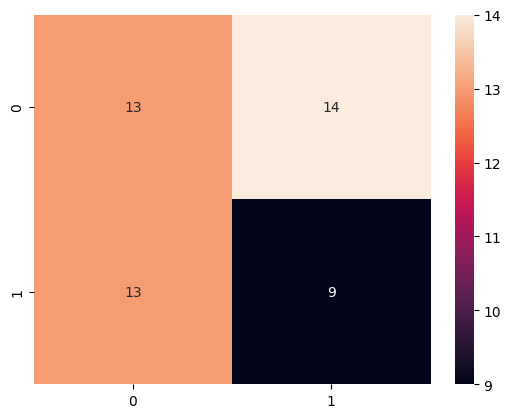

In [180]:
prediction=np.array(prediction)
sns.heatmap(confusion_matrix(prediction[:,0], prediction[:,1]), annot=True)

In [181]:
compare_matrix=confusion_matrix(prediction[:,0], prediction[:,1])
print(compare_matrix)                                        
precision=compare_matrix[1][1]/(compare_matrix[1][1]+compare_matrix[0][1])
print('Precision=', precision)
recall=compare_matrix[1][1]/(compare_matrix[1][1]+compare_matrix[1][0])
print('Recall=', recall)

[[13 14]
 [13  9]]
Precision= 0.391304347826087
Recall= 0.4090909090909091


In [182]:
selection_features[selection_features['Important']!=0]


,Important
FB16L,0.021517
FB25L,0.100699
Trot_Stride lengh,0.146355
HMPF16,0.055944
HMPF42,0.097166
...,...
FB32L,0.074762
Trot_Stride lengh,0.161386
HMPF42,0.097166
HMPR8,0.076287


HMPR15               38
HMPL16               37
Trot_Stride lengh    31
HMPF65               27
HMPR7                23
                     ..
FB32L                 1
FB27L                 1
FB22L                 1
FB07                  1
HMPF64                1
Length: 71, dtype: int64


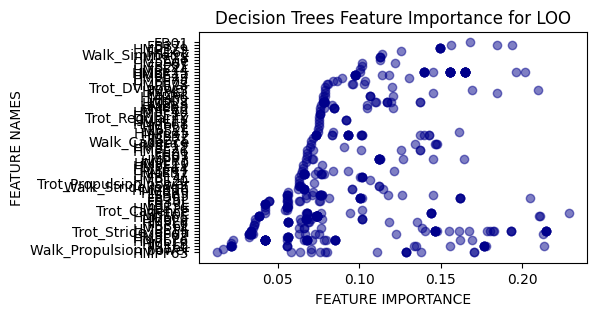

In [183]:

forplot=selection_features[selection_features['Important']!=0].sort_values(['Important'], axis=False)

sf_list=list(forplot.index)
tt=[i for i in sf_list if sf_list.count(i)<0]
unique=list(set(tt))
for i in unique:
    forplot=forplot.drop(i, axis=0)
print(forplot.value_counts(forplot.index))
plt.figure(figsize=(5,3))
plt.scatter(x=forplot['Important'], y=forplot.index, color='darkblue', alpha=0.5)
plt.title('Decision Trees ' + 'Feature Importance for LOO')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');



In [184]:
# Modeling on the full dataset

DTall_model=DecisionTreeClassifier(criterion='gini',  max_features='sqrt', random_state=104) #the best random_state=111

DTall_model.fit(X_initial,y)
feats_=pd.DataFrame(index=X_initial.columns, data=DTall_model.feature_importances_, columns=['Important'])
feats_[feats_['Important']>0].sort_values('Important', ascending=False)


,Important
FB39,0.235867
HMPF74,0.222404
HMPF1,0.198476
FH10L,0.158807
HMPF14,0.115702
HMPF46,0.068743


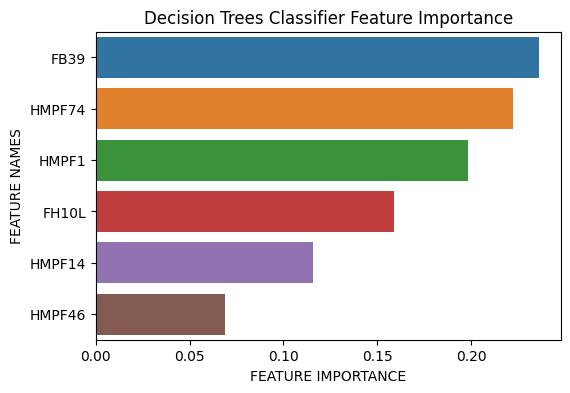

In [185]:
feats_for_plot=feats_[feats_['Important']>0].sort_values('Important', ascending=False)
plt.figure(figsize=(6,4))
#Plot Searborn bar chart
sns.barplot(x=feats_for_plot['Important'], y=feats_for_plot.index)
#Add chart labels
plt.title('Decision Trees Classifier ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

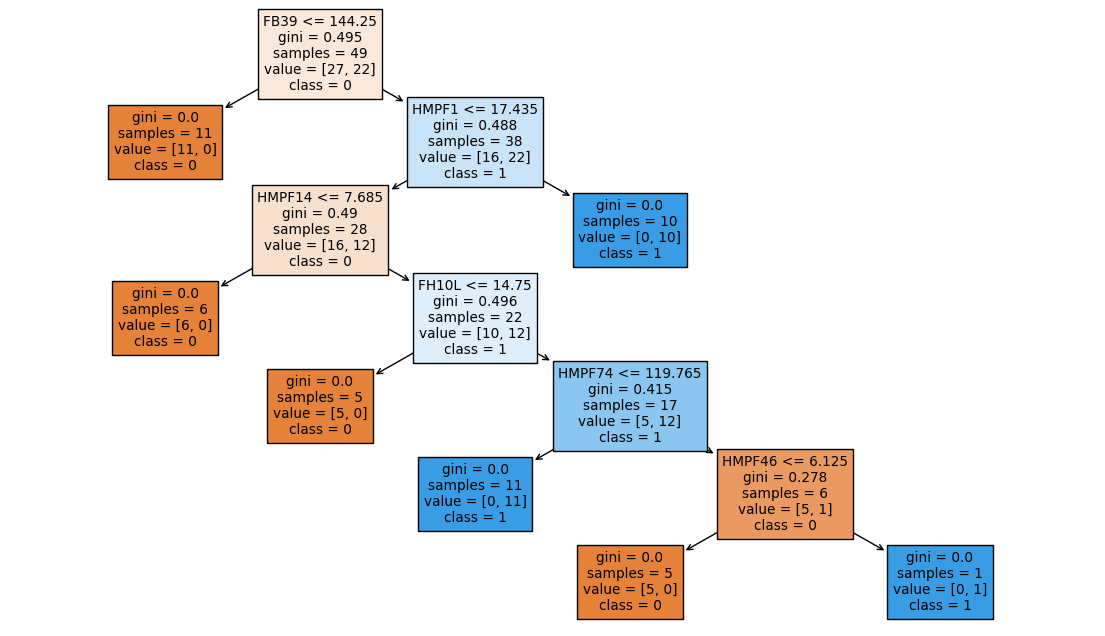

In [186]:
fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(DTall_model, feature_names=feats_.index, class_names='01', filled=True)